In [1]:
from wannier import *
import matplotlib.pyplot as plt
from scipy.linalg import norm

# activate latex text rendering
from matplotlib import rc
rc('text', usetex=True)

            
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext jupyternotify

<IPython.core.display.Javascript object>

# Global Parameters

In [2]:
sz = 24
save_images = True
std_pxp_list = [(0,0), (0,1), (0,2), 
                (sz//2,0), (sz//2,1), (sz//2,2),
                (sz-1,0), (sz-1,1), (sz-1,2)]
std_pjypj_list = [(0,0), 
                  (sz//4, sz//4), 
                  (3*sz//4, sz//4),
                  (sz//4, 3*sz//4)]

# Testing Functions

In [3]:
def test_bins(hm, tX, plot_d):
    # Diagonalize PXP
    E, _ = hm.diag_PXP(tX)
    E = np.real_if_close(E)

    fig = plt.figure(figsize=(12,6))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    
    ax0.plot(E, 'o')
    ax0.set_xlabel('Eigenvalue Number')
    ax0.set_ylabel('Eigenvalue')

    ax1.plot(E[:100], 'o')
    ax1.set_xlabel('Eigenvalue Number')
    ax1.set_ylabel('Eigenvalue')
    
    if plot_d["save_images_b"] == True:
        filename = plot_d["prefix"] + "_pxp_evals.png"
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
    return E

def apply_ipp(hm, bins, tY, plot_d):   
    if hm.bdy_cond == "dirichlet":
        pad_value = 0
    else:
        pad_value = None
        
    # Plot some efuncs of PXP
    if plot_d["pxp_list"] is not None:
        for plot_num, (bin_num, idx) in enumerate(plot_d["pxp_list"]):
            i = bins[bin_num] + idx
            
            if plot_d["save_images_b"]:
                filename = plot_d["prefix"] + "_pxp_%d" % (plot_num)
            else:
                filename = None
            
            
            hm.plot_function(hm.PXP_V[:,i] + 1e-15, # Prevents underflow in plots
                             plot_type=plot_d["pxp_plot_type"],
                             filename=filename,
                             pad_value=pad_value)
            
                
    print("++++++++++++++++++++++++++++++++++++++++++++")
    
    # Plot some efuncs of PjYPj
    if plot_d["pjypj_list"] is not None:
        for plot_num, (bin_num, idx) in enumerate(plot_d["pjypj_list"]):
            i = bins[bin_num] + idx
            
            if plot_d["save_images_b"]:
                filename = plot_d["prefix"] + "_pjypj_%d" % (plot_num)
            else:
                filename = None
            
            Wj = hm.diag_PjYPj(tY, bins, j0=bin_num)
            hm.plot_function(Wj[:,idx] + 1e-15, # Prevents underflow in plots
                             plot_type=plot_d["pjypj_plot_type"],
                             filename=filename, 
                             pad_value=pad_value)

# Initial $PXP$ Plot

In [4]:
plotting_parameters = { "save_images_b": False } # Disables default plot saving behavior

model_parameters_topo = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 1/4,
    "v": 0,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

model_parameters_non_topo = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 0,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

Gap: 2.000000
[-1.03351263 -1.         -1.          1.          1.          1.03351263]


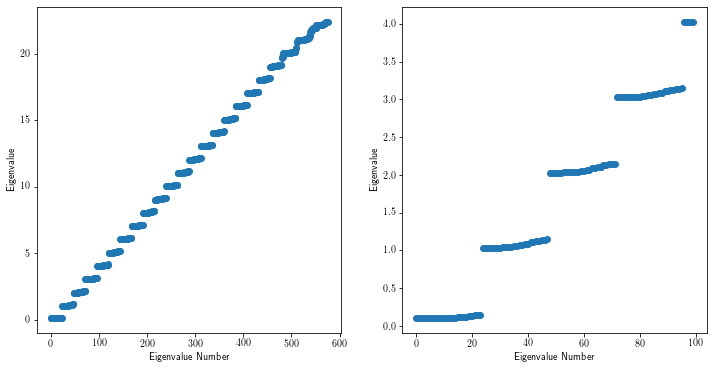

Gap: 2.000000
[-1. -1. -1.  1.  1.  1.]


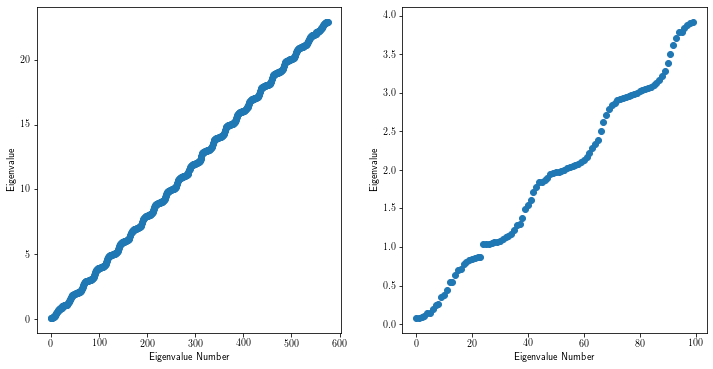

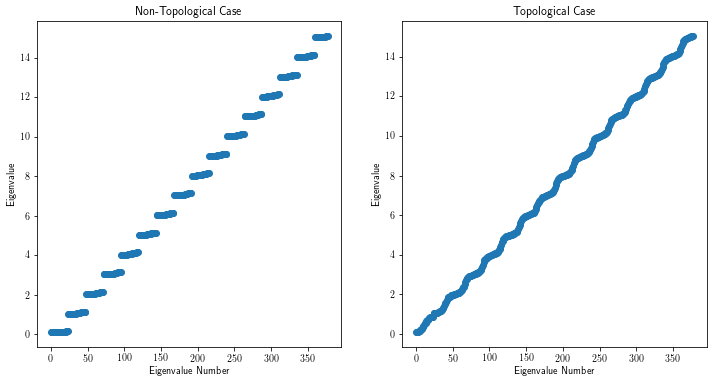

In [5]:
hm_topo = HaldaneModel(**model_parameters_topo)
hm_non_topo = HaldaneModel(**model_parameters_non_topo)

X, _ = hm_topo.gen_position_ops(hm_topo.N, hm_topo.M)

E_non_topo = test_bins(hm_non_topo, X, plotting_parameters)
E_topo = test_bins(hm_topo, X, plotting_parameters)

fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(E_non_topo[:378], 'o')
ax0.set_xlabel('Eigenvalue Number')
ax0.set_ylabel('Eigenvalue')
ax0.set_title('Non-Topological Case')


ax1.plot(E_topo[:378], 'o')
ax1.set_xlabel('Eigenvalue Number')
ax1.set_ylabel('Eigenvalue')
ax1.set_title('Topological Case')

filename = "../images/pxp_evals_topo_comparison_zoom.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()

# Dirichlet (no disorder)

In [6]:
plotting_parameters = \
{
    "prefix": "../images/dirichlet_no_disorder",
    "save_images_b": save_images,
    "pxp_list": std_pxp_list,
    "pxp_plot_type": "3d",
    "pjypj_list": std_pjypj_list,
    "pjypj_plot_type": "both"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": .1,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "dirichlet",
    "noise": 0
}

Gap: 1.006447
[-0.54689121 -0.52955647 -0.50322337  0.50322337  0.52955647  0.54689121]


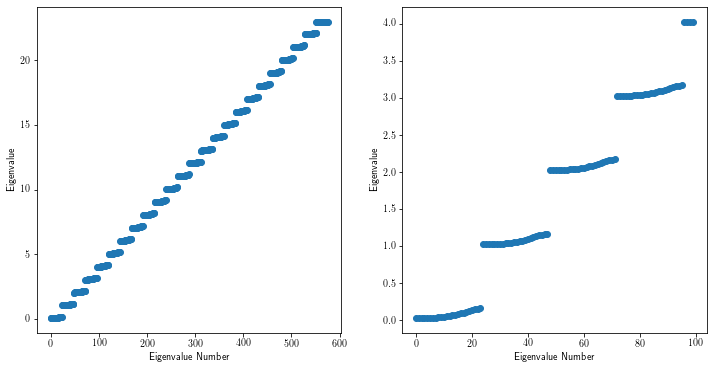

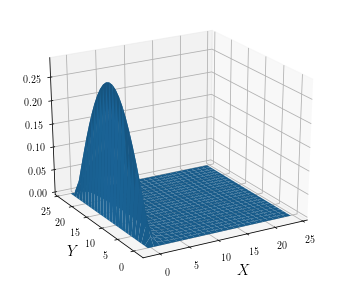

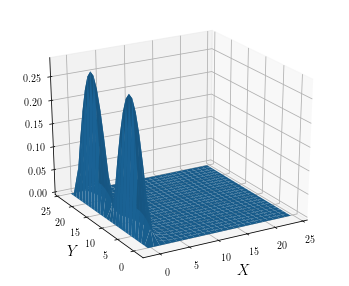

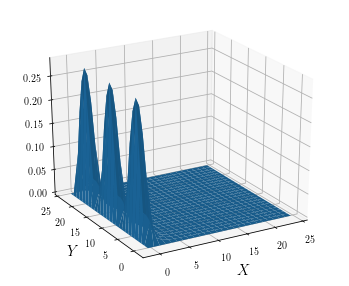

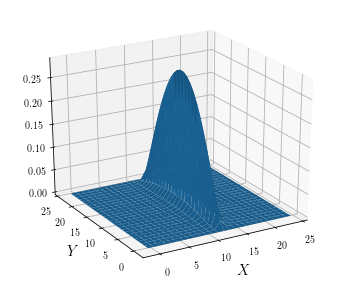

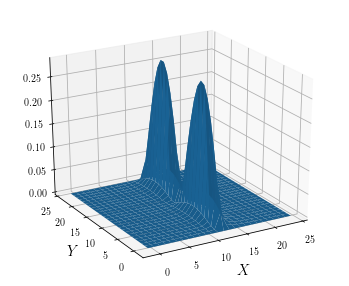

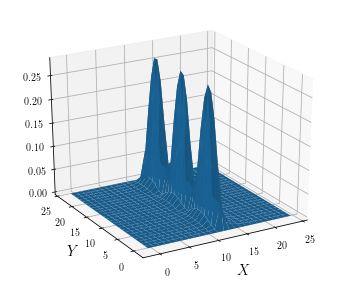

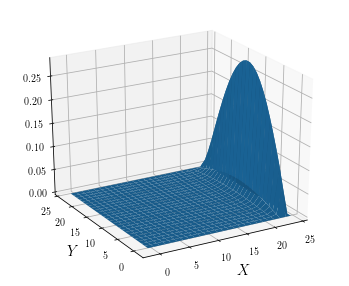

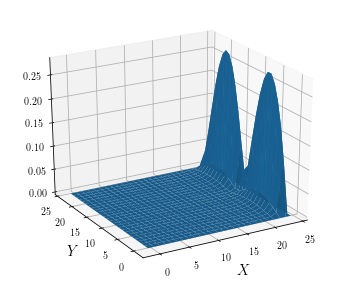

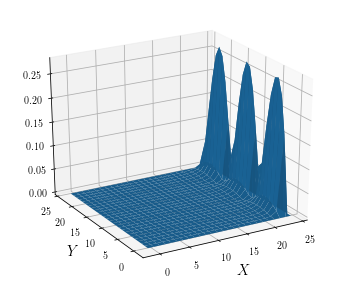

++++++++++++++++++++++++++++++++++++++++++++


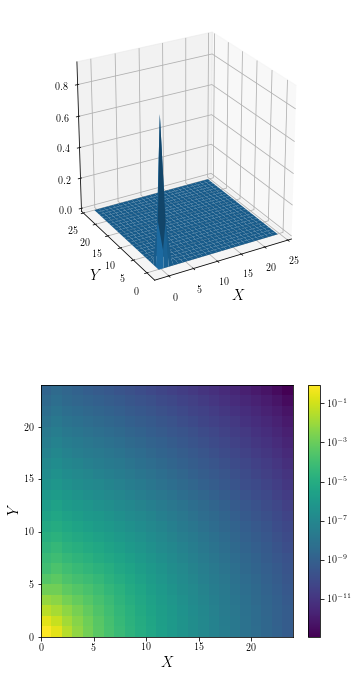

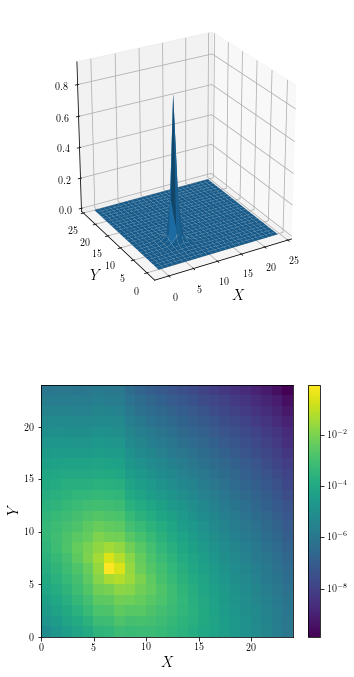

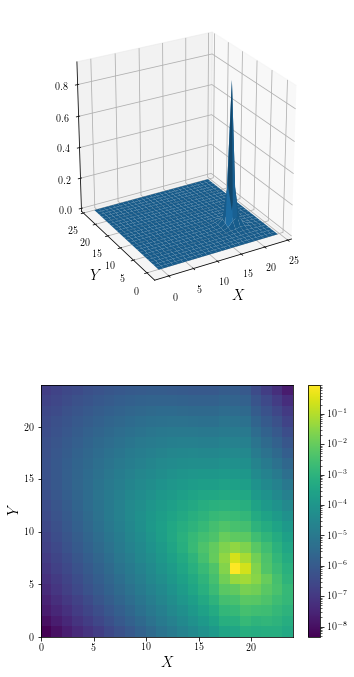

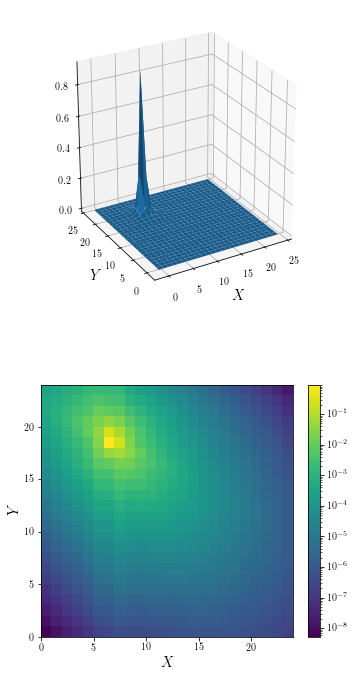

In [7]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

test_bins(hm, X, plotting_parameters)

# Map eigenvalues to bins
bins = hm.expected_bins("X")

apply_ipp(hm, bins, Y, plotting_parameters)

# Dirichlet (weak disorder)

In [8]:
plotting_parameters = \
{
    "prefix": "../images/dirichlet_weak_disorder",
    "save_images_b": save_images,
    "pxp_list": None,
    "pxp_plot_type": "3d",
    "pjypj_list": std_pjypj_list,
    "pjypj_plot_type": "both"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": .1,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "dirichlet",
    "noise": np.sqrt(.25)
}

Gap: 0.253192
[-0.31483986 -0.23035028 -0.16579174  0.08740019  0.12040843  0.26018675]


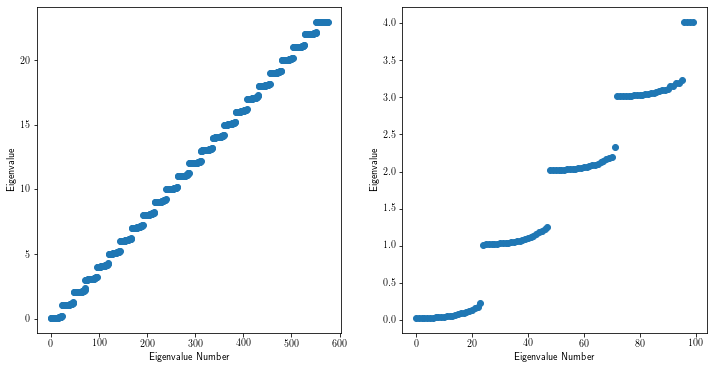

++++++++++++++++++++++++++++++++++++++++++++


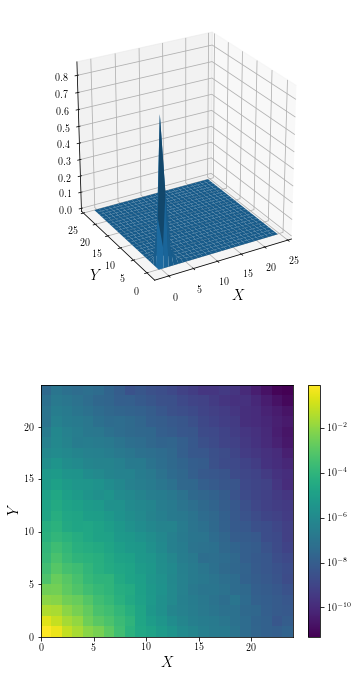

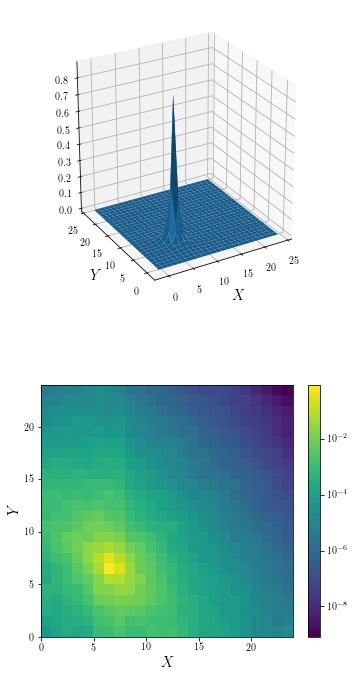

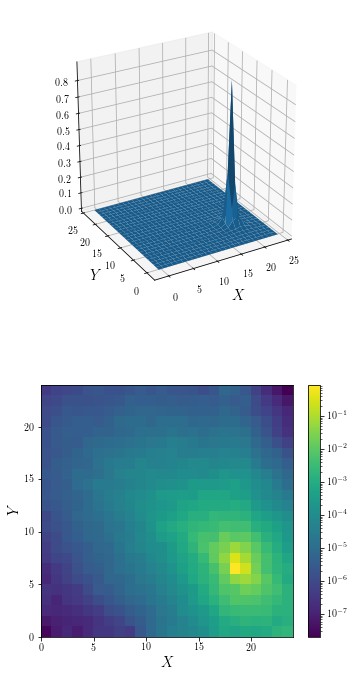

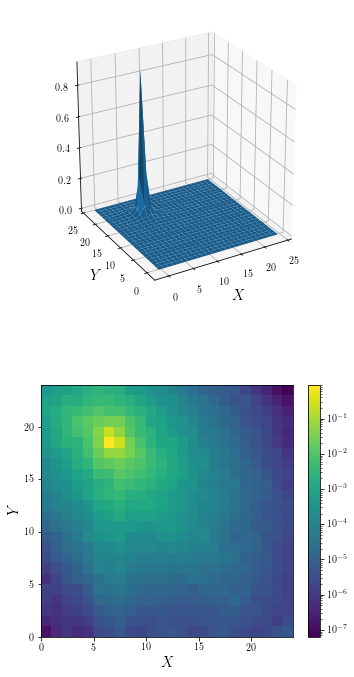

In [9]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

np.random.seed(8)
E = test_bins(hm, X, plotting_parameters)

# Map eigenvalues to bins
bins = hm.expected_bins("X")

apply_ipp(hm, bins, Y, plotting_parameters)

# Dirichlet (rotated)

In [10]:
# Update pjypj list
rot_pxp_list = [(sz//3,0), (sz//3,1), (sz//3,2), 
                (2*sz//3,0), (2*sz//3,1), (2*sz//3,2),
                (sz,0), (sz,1), (sz,2)]
rot_pjypj_list = [(0,0), (sz//2,sz//8), (sz,sz//8), (3*sz//2,sz//8) ]


plotting_parameters = \
{
    "prefix": "../images/dirichlet_rotated",
    "save_images_b": save_images,
    "pxp_list": rot_pxp_list,
    "pxp_plot_type": "3d",
    "pjypj_list": rot_pjypj_list,
    "pjypj_plot_type": "both"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": .1,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "dirichlet",
    "noise": 0
}

Gap: 1.006447
[-0.54689121 -0.52955647 -0.50322337  0.50322337  0.52955647  0.54689121]


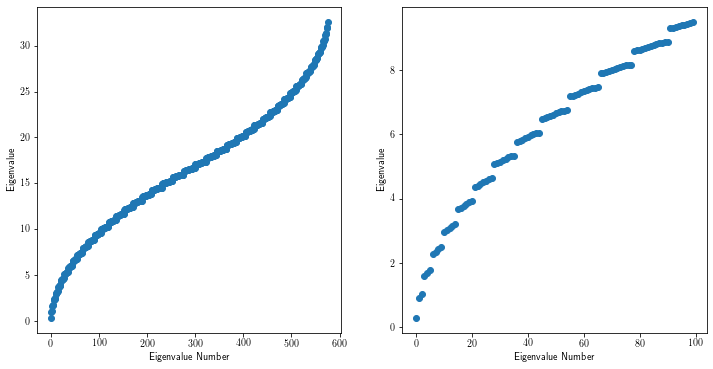

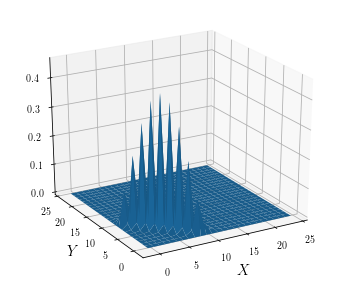

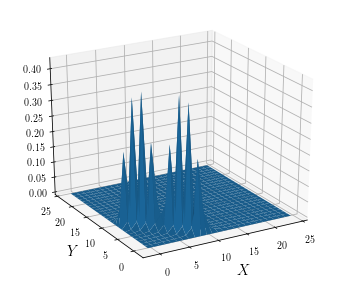

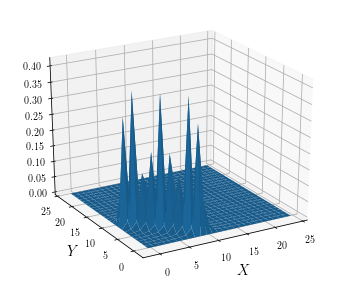

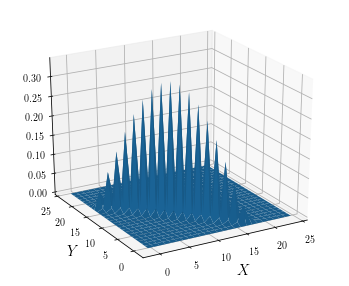

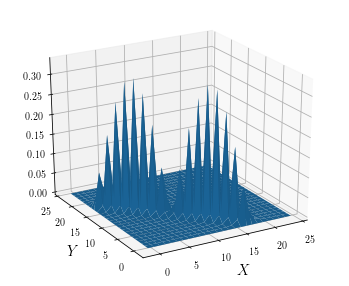

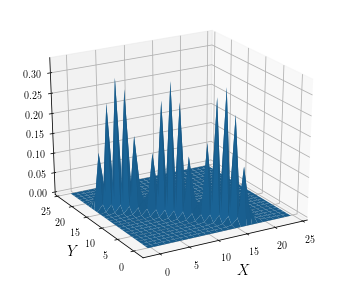

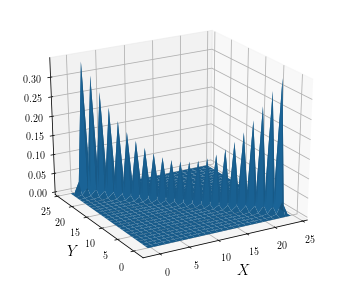

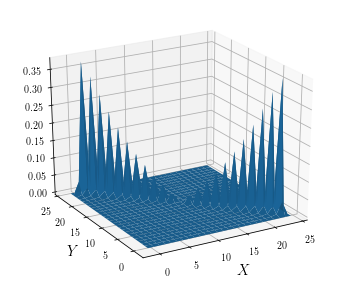

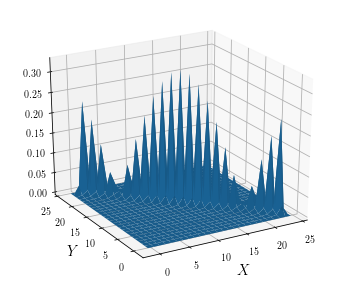

++++++++++++++++++++++++++++++++++++++++++++


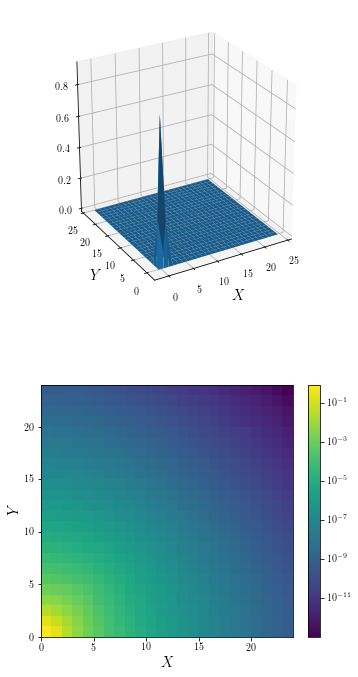

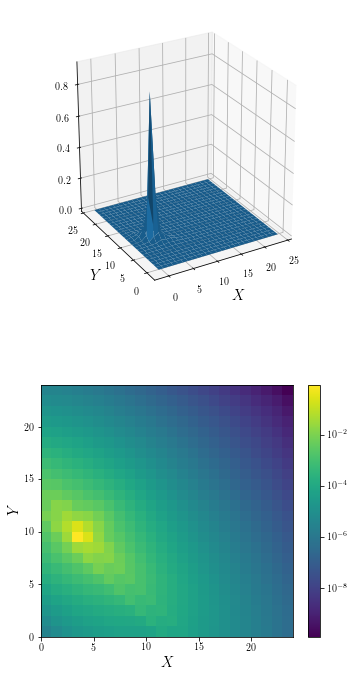

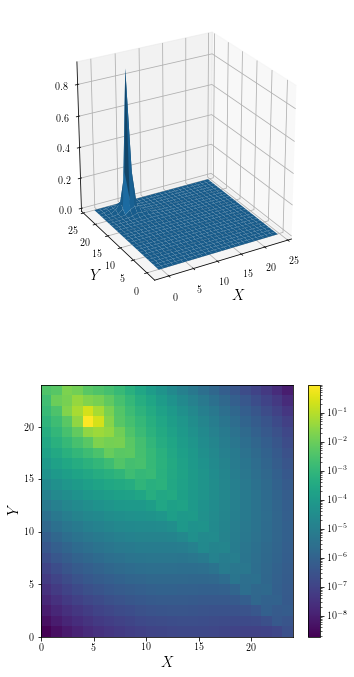

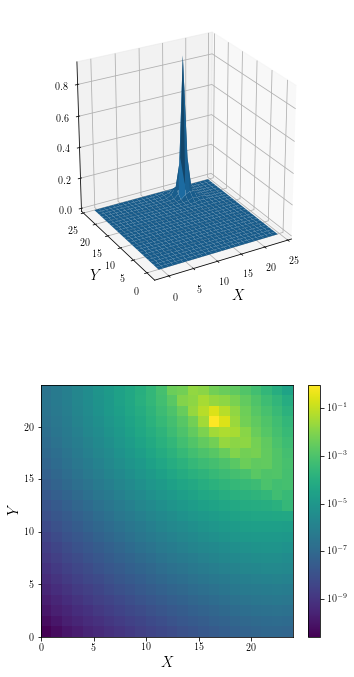

In [11]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

E = test_bins(hm, (X + Y) / np.sqrt(2), plotting_parameters)

# Map eigenvalues to bins
bins = np.nonzero([ E[i+1] - E[i] > .3 for i in range(E.size-1)])[0] + 1
bins = np.concatenate(([0], bins, [E.size]))


apply_ipp(hm, bins, (X - Y) / np.sqrt(2), plotting_parameters)

# Dirichlet (strong disorder)

In [12]:
plotting_parameters = \
{
    "prefix": "../images/dirichlet_strong_disorder",
    "save_images_b": save_images,
    "pxp_list": None,
    "pxp_plot_type": "3d",
    "pjypj_list": None,
    "pjypj_plot_type": "2d"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": .1,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "dirichlet",
    "noise": np.sqrt(100)
}

Gap: 0.067341
[0.40253958 0.42505721 0.43015311 0.49749453 0.54014232 0.54394724]


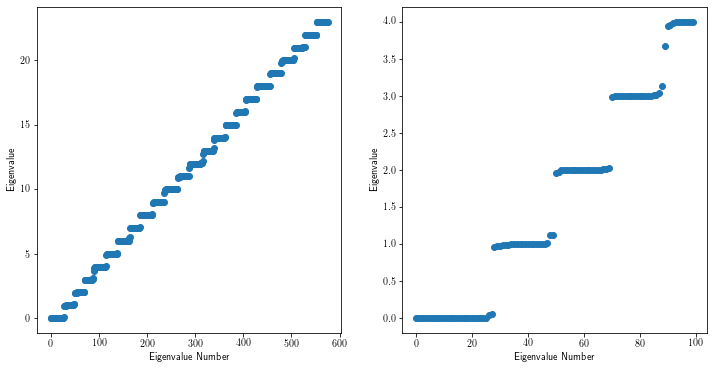

In [13]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

np.random.seed(8)
E = test_bins(hm, X, plotting_parameters)

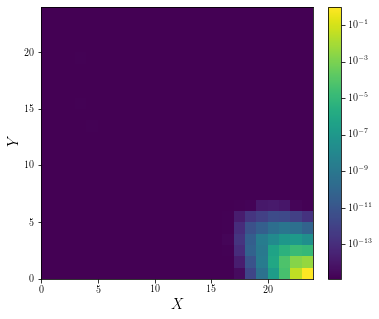

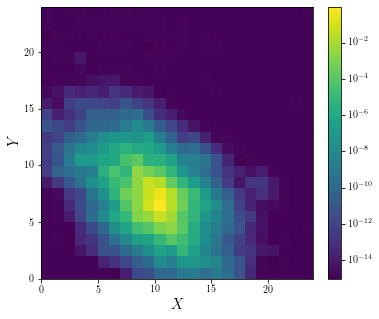

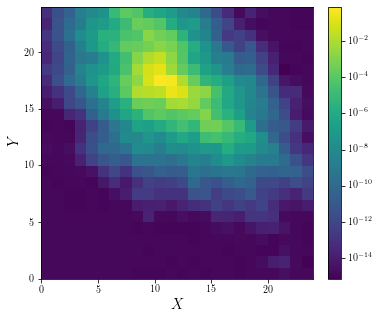

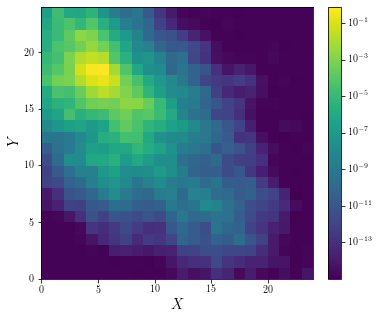

In [14]:
_, V = np.linalg.eigh(hm.H)

V_list = [0, 140, 280, 420]
for plot_num, idx in enumerate(V_list):
    if plotting_parameters["save_images_b"]:
        filename = plotting_parameters["prefix"] + "_h_v%d" % plot_num
    else:
        filename = None
    
    hm.plot_function(V[:,idx] + 1e-15, plot_type="2d", filename = filename)


++++++++++++++++++++++++++++++++++++++++++++


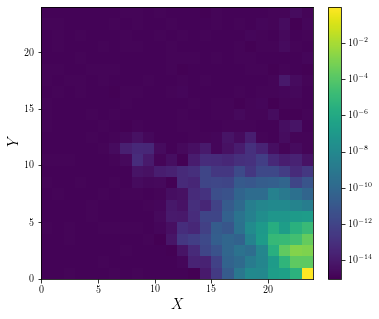

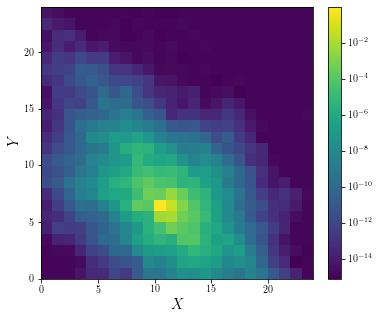

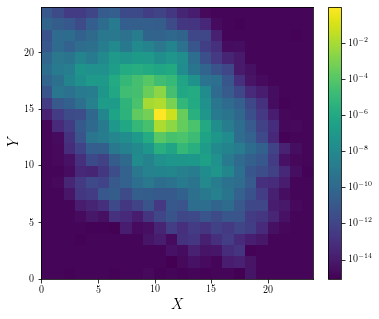

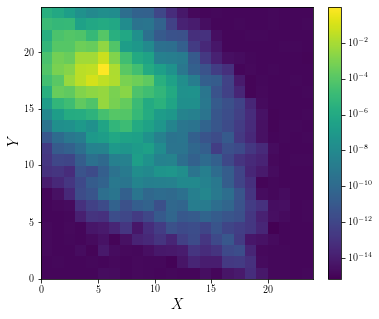

In [15]:
# Map eigenvalues to bins
bins = np.nonzero([ E[i+1] - E[i] > .5 for i in range(E.size-1)])[0] + 1
bins = np.concatenate(([0], bins, [E.size]))

plotting_parameters["pjypj_list"] = [ (23,0), (10,5), (10,15), (5,20) ]

apply_ipp(hm, bins, Y, plotting_parameters)

# Periodic (non-topo)

In [16]:
plotting_parameters = \
{
    "prefix": "../images/periodic_non_topo",
    "save_images_b": save_images,
    "pxp_list": None,
    "pxp_plot_type": "3d",
    "pjypj_list": None,
    "pjypj_plot_type": "both"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 0,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

Gap: 2.000000
[-1.03351263 -1.         -1.          1.          1.          1.03351263]


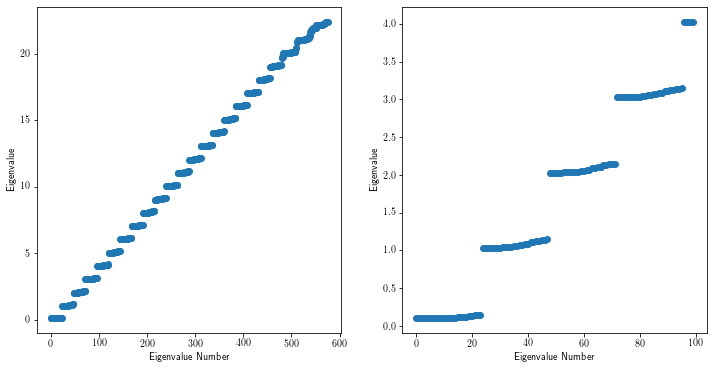

++++++++++++++++++++++++++++++++++++++++++++


/Users/kevin/local_Projects/wannier/code_KS/wannier.py:259: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax1.plot_surface(nn, mm, padded[::,:])


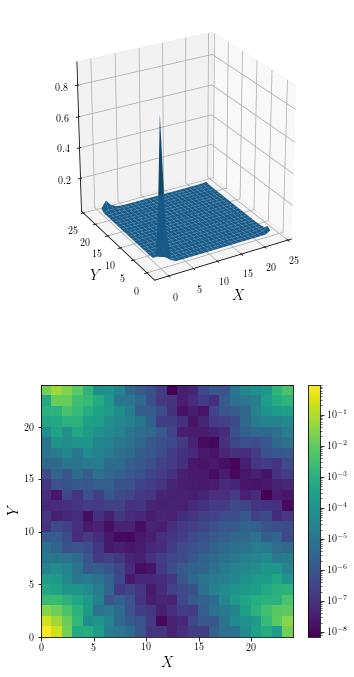

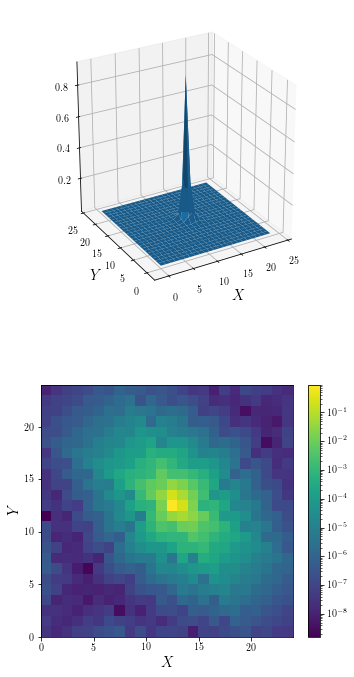

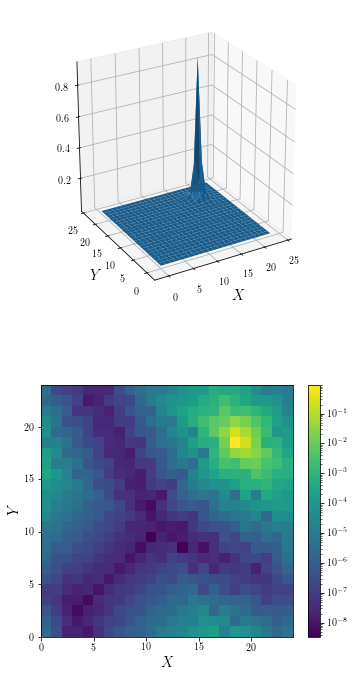

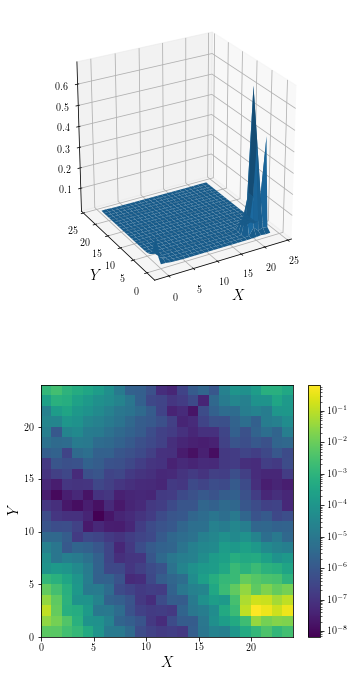

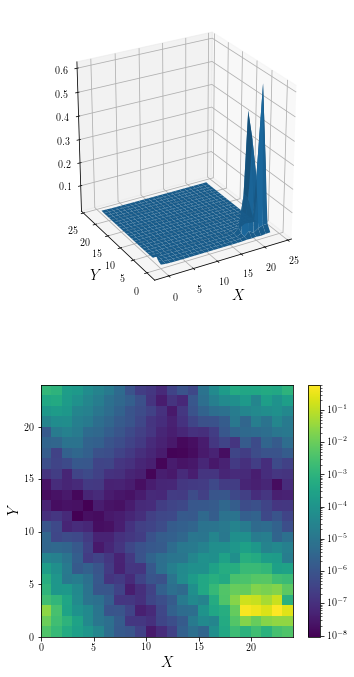

In [17]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

test_bins(hm, X, plotting_parameters)

# Map eigenvalues to bins
bins = hm.expected_bins("X")
l = bins.size
bins = np.delete(bins, [l-5,l-4,l-3,l-2])

plotting_parameters["pjypj_list"] = [ (0,0), (sz//2, sz//2), (3*sz//4, 3*sz//4), (-2, sz//2), (-2, sz//2+1)]

apply_ipp(hm, bins, Y, plotting_parameters)

# Periodic (topo)

In [18]:
plotting_parameters = \
{
    "prefix": "../images/periodic_topo",
    "save_images_b": save_images,
    "pxp_list": None,
    "pxp_plot_type": "3d",
    "pjypj_list": std_pjypj_list,
    "pjypj_plot_type": "both"
}
model_parameters = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 1/4,
    "v": 0,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

Gap: 2.000000
[-1. -1. -1.  1.  1.  1.]


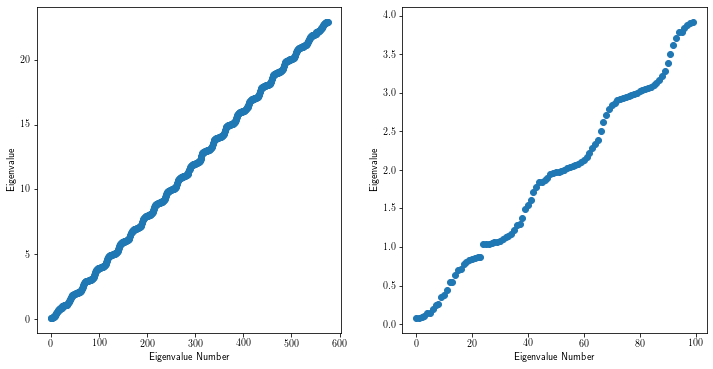

++++++++++++++++++++++++++++++++++++++++++++


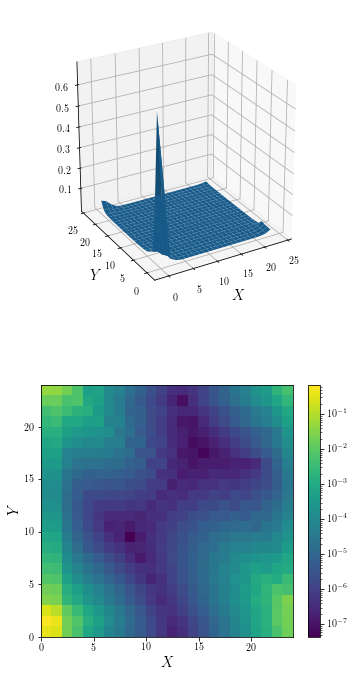

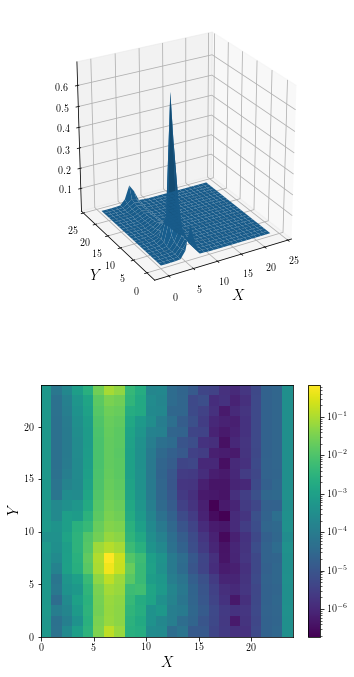

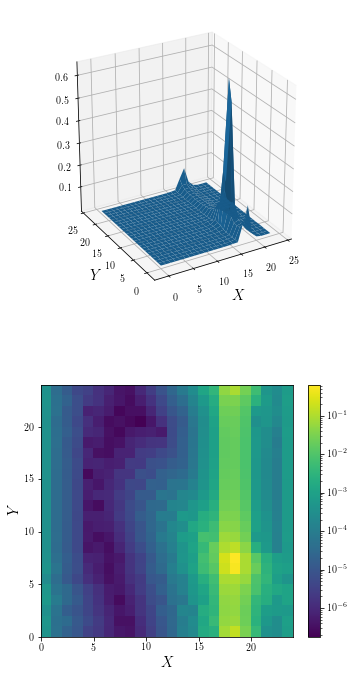

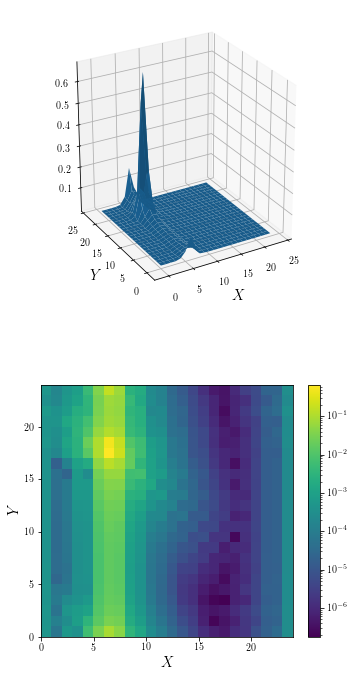

In [19]:
hm = HaldaneModel(**model_parameters)
X, Y = hm.gen_position_ops(sz, sz)

test_bins(hm, X, plotting_parameters)

# Map eigenvalues to bins
bins = hm.expected_bins("X")

apply_ipp(hm, bins, Y, plotting_parameters)

# Periodic $PXP$ Topology test

In [20]:
plotting_parameters = { "save_images_b": False } # Disables default plot saving behavior

model_parameters_topo = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 1/4,
    "v": 0,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

model_parameters_non_topo = \
{ 
    "N": sz,
    "M": sz,
    "t": 1,
    "tp": 0,
    "v": 1,
    "phi": np.pi/2,
    "bdy_cond": "periodic",
    "noise": 0
}

Gap: 2.000000
[-1.03351263 -1.         -1.          1.          1.          1.03351263]


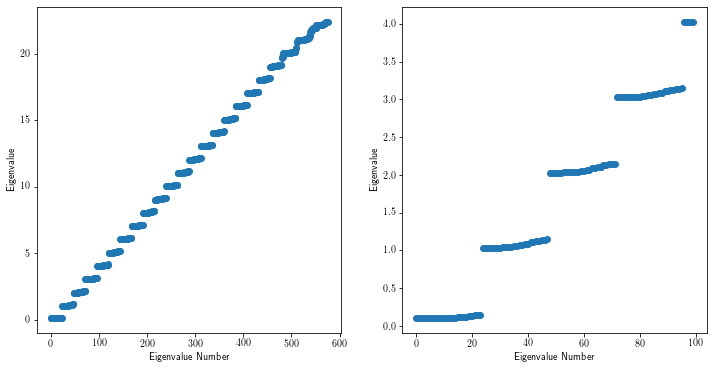

Gap: 2.000000
[-1. -1. -1.  1.  1.  1.]


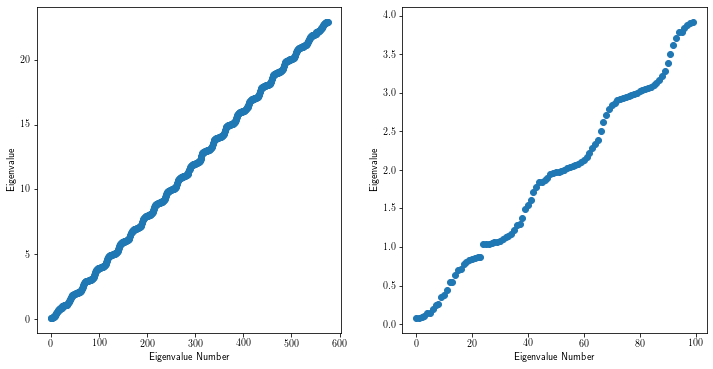

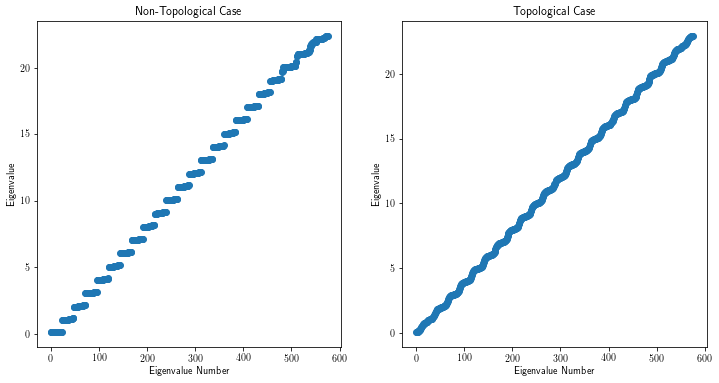

In [21]:
hm_topo = HaldaneModel(**model_parameters_topo)
hm_non_topo = HaldaneModel(**model_parameters_non_topo)

X, Y = hm_topo.gen_position_ops(hm_topo.N, hm_topo.M)

E_non_topo = test_bins(hm_non_topo, X, plotting_parameters)
E_topo = test_bins(hm_topo, X, plotting_parameters)

fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(E_non_topo, 'o')
ax0.set_xlabel('Eigenvalue Number')
ax0.set_ylabel('Eigenvalue')
ax0.set_title('Non-Topological Case')


ax1.plot(E_topo, 'o')
ax1.set_xlabel('Eigenvalue Number')
ax1.set_ylabel('Eigenvalue')
ax1.set_title('Topological Case')

filename = "../images/pxp_evals_topo_comparison.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()